# 0102 Visualize data with Python

In [1]:
import pandas as pd

In [2]:
# Load data from a text file
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/grades.csv
df_students = pd.read_csv('grades.csv',delimiter=',',header='infer')

#remove rows with missing data
df_students= df_students.dropna(axis=0, how='any')

#calculate passes assuming 60 is the grade
passes = pd.Series(df_students['Grade']>=60)

#add column
df_students = pd.concat([df_students, passes.rename('Pass')], axis = 1)

--2025-03-10 08:39:01--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/grades.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322 [text/plain]
Saving to: ‘grades.csv.3’

grades.csv.3        100%[===================>]     322  --.-KB/s    in 0s      

2025-03-10 08:39:01 (16.9 MB/s) - ‘grades.csv.3’ saved [322/322]



In [3]:
df_students

,Name,StudyHours,Grade,Pass
0,Dan,10.00,50.0,False
1,Joann,11.50,50.0,False
2,Pedro,9.00,47.0,False
3,Rosie,16.00,97.0,True
4,Ethan,9.25,49.0,False
5,Vicky,1.00,3.0,False
6,Frederic,11.50,53.0,False
7,Jimmie,9.00,42.0,False
8,Rhonda,8.50,26.0,False
9,Giovanni,14.50,74.0,True


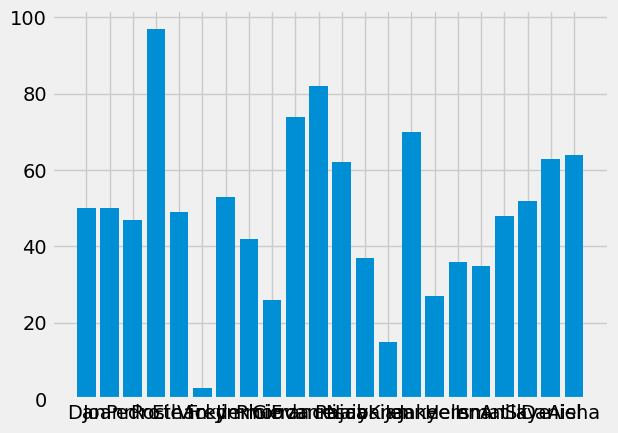

In [4]:
# bar chart that shows the grade of each student
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

plt.bar(x=df_students['Name'], height=df_students['Grade'])
plt.show()

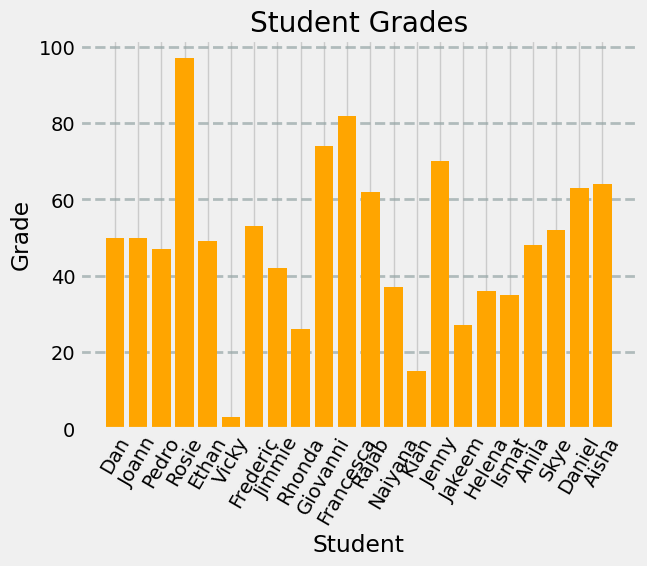

In [5]:
plt.bar(x=df_students['Name'], height=df_students['Grade'], color='orange')

plt.title('Student Grades')
plt.xlabel('Student')
plt.ylabel('Grade')
plt.grid(color= '#95a5a6', 
         linestyle='--', 
         linewidth=2,
         axis='y',
         alpha=0.7)
plt.xticks(rotation=60)

plt.show()

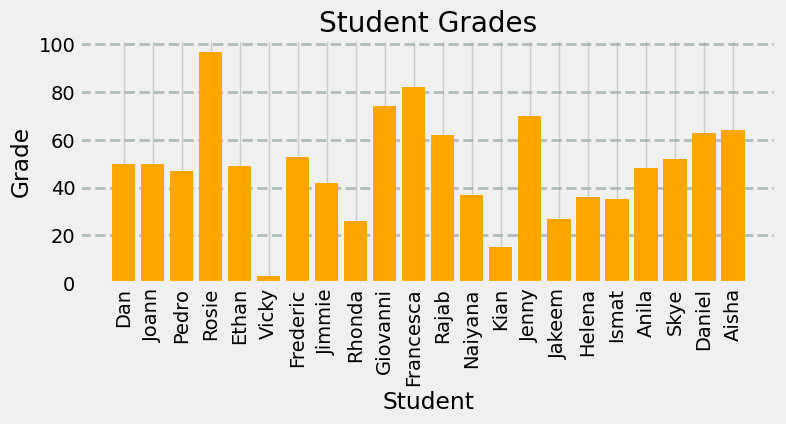

In [6]:

#Plots are generally contained within figures.

fig = plt.figure(figsize=(8,3))

plt.bar(x=df_students['Name'], height=df_students['Grade'], color='orange')

plt.title('Student Grades')
plt.xlabel('Student')
plt.ylabel('Grade')
plt.grid(color= '#95a5a6', 
         linestyle='--', 
         linewidth=2,
         axis='y',
         alpha=0.7)
plt.xticks(rotation=90)

plt.show()

/tmp/ipykernel_1843/1585576452.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(df_students['Name'],rotation=90, fontsize=10)
/tmp/ipykernel_1843/1585576452.py:21: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


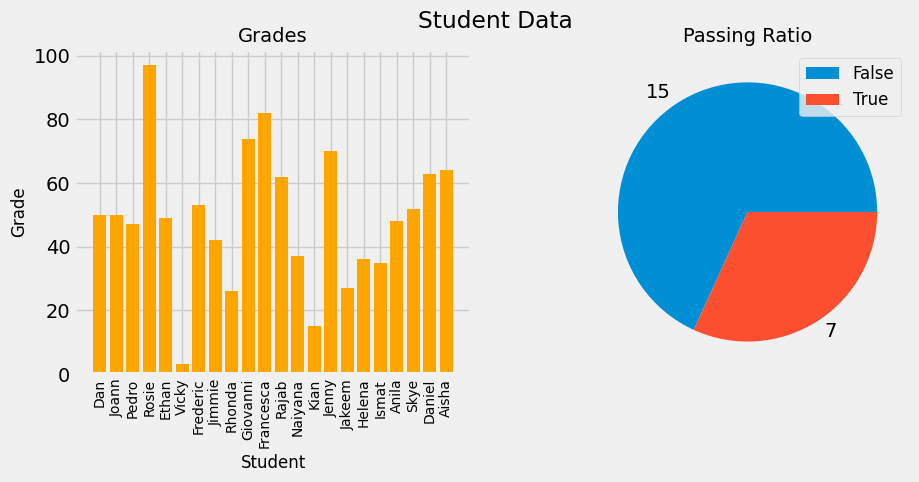

In [7]:
# create multiple plots within a figure
# barchart with student grades and piechart comparing passes vs non-passes

fig, ax = plt.subplots(1,2, figsize=(10,4))

#barchart
ax[0].bar(x=df_students['Name'], height=df_students['Grade'], color='orange')
ax[0].set_title('Grades', fontsize=14)
ax[0].set_xlabel('Student',fontsize=12)
ax[0].set_ylabel('Grade', fontsize=12)
ax[0].set_xticklabels(df_students['Name'],rotation=90, fontsize=10)


#pie chart
pass_counts = df_students['Pass'].value_counts()
ax[1].pie(pass_counts, labels=pass_counts)
ax[1].set_title('Passing Ratio', fontsize=14)
ax[1].legend(pass_counts.keys().tolist(), fontsize=12)

fig.suptitle('Student Data')
fig.show()

### Descriptive Statistics

examining a variable is very often related to understanding its distribution, because this tells us many interesting features of this variable. Histograms can be very helpful in doing that

/tmp/ipykernel_1843/1024670054.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


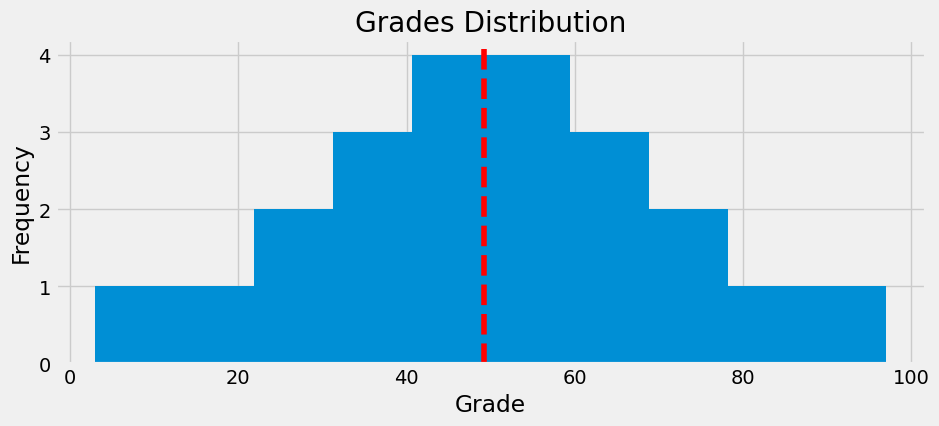

In [8]:
# the feature I want to analyze
data = df_students['Grade']

# figure setting
fig = plt.figure(figsize=(10,4))

# histogram and labels
plt.hist(data)
plt.title("Grades Distribution")
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.axvline(x = data.mean(), color ='red', linestyle='--')
#show figure
fig.show()

### Central Tendency Measures

In order to understand a distribution there are some statistical measures that are relevant

* Mean: $\frac{\Sigma_{i=1}^{k}x_i}{k}$
* Median: 50% percentile
* Mode: most common occurring value

/tmp/ipykernel_1843/1878337050.py:16: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


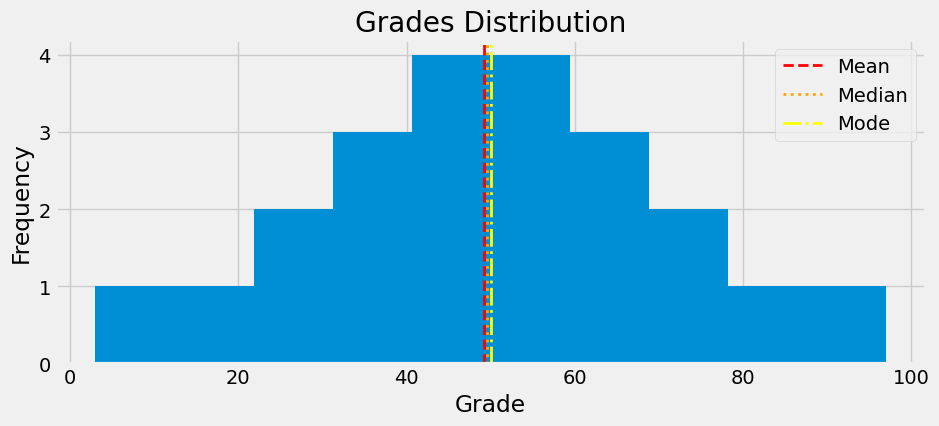

In [9]:
data = df_students['Grade']

# figure setting
fig = plt.figure(figsize=(10,4))

# histogram and labels
plt.hist(data)
plt.title("Grades Distribution")
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.axvline(x = data.mean(), color ='red', linestyle='--', label='Mean', linewidth=2)
plt.axvline(x= data.median(), color='orange', linestyle=':', label ='Median', linewidth=2)
plt.axvline(x= data.mode()[0], color= 'yellow', linestyle='-.', label='Mode', linewidth=2)
plt.legend()
#show figure
fig.show()

/tmp/ipykernel_1843/4123407541.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


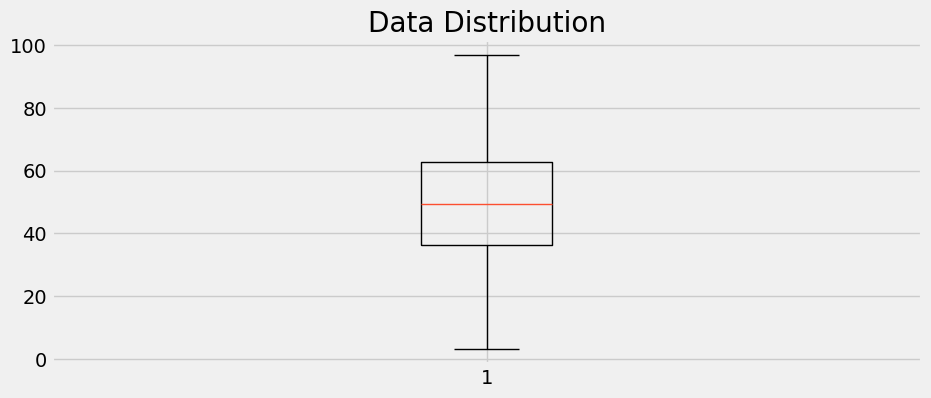

In [10]:
# visualize distribution with box plots

fig = plt.figure(figsize=(10,4))

plt.boxplot(data)
plt.title('Data Distribution')

fig.show()

In [18]:
# box plot and histogram can be combined 
def show_distribution(data):

    plt.style.use('fivethirtyeight')
    # compute stat measures
    min_val = data.min()
    max_val = data.max()
    mean= data.mean()
    median = data.median()
    mode = data.mode()[0]
    
    #create frame
    fig, ax = plt.subplots(2,1, figsize=(10,8))

    #histogram
    ax[0].hist(data, color='powderblue')
    ax[0].set_ylabel('Frequency')

    #add lines
    ax[0].axvline(x=min_val, color='deepskyblue', linestyle='--', linewidth=2, label='min')
    ax[0].axvline(x=max_val, color='dodgerblue', linestyle='--', linewidth=2, label='max')
    ax[0].axvline(x=mean, color='royalblue', linestyle='--', linewidth=2, label='mean')
    ax[0].axvline(x=median, color='mediumblue', linestyle='--', linewidth=2, label='median')
    ax[0].axvline(x=mode, color='navy', linestyle='--', linewidth=2, label='mode')
    ax[0].legend()

    #boxplot
    ax[1].boxplot(data, vert=False)
    ax[1].set_xlabel('Value')
    
    fig.suptitle('Distribution Data')
    fig.show()



/tmp/ipykernel_1843/49745424.py:32: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


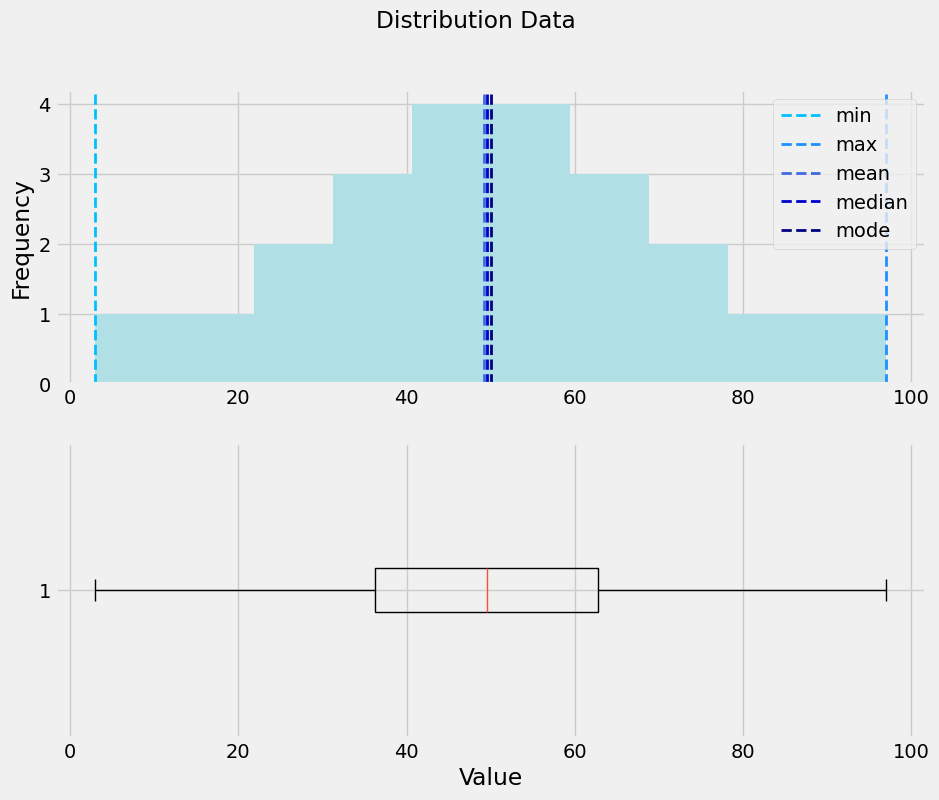

In [19]:
show_distribution(data=data)